# Classification and Prediction of Diabetes in Pima Women

This exercise involves determining whether Pima Native American women living near Phoenix, Arizona have diabetes by learning from a dataset. 

The [dataset](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) contains the following fields:
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1)

This notebook is adapted from http://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History 

import matplotlib.pyplot as plt
import numpy, math


# fix random seed for reproducibility
seed = 43
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables then into training and test sets
X = dataset[:,0:8]
Y = dataset[:,8]   # 1 = tested positive for diabetes

num_examples = X.shape[0]
validation_split_percentage = 0.3    # 30% of examples set aside as validation set 
split_index = math.floor(num_examples * (1-validation_split_percentage)) # 70% of dataset will go toward training

X_train = X[:split_index-1]
Y_train = Y[:split_index-1]

X_test = X[split_index-1:]
Y_test = Y[split_index-1:]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model, retain history for later analysis
history = History()
history = model.fit(X, Y, nb_epoch=150, batch_size=10, validation_split=validation_split_percentage, callbacks=[history], verbose=0)

# evaluate the model
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

536/536 [==============================] - 0s     224/536 [===========>..................] - ETA: 0s

acc: 74.63%
loss: 51.48%


# Test Loss after Training

Now that we've trained the model above, it's time to see how the model performs on data it hasn't trained on:

In [9]:
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/232 [===>..........................] - ETA: 0s160/232 [===================>..........] - ETA: 0s
acc: 73.71%


We see that the training and test accuracies are both relatively high and roughly equal. This indicates that the model exhibits low variance and low bias and will likely produce a lower error given more training data.

# Plotting the Results

We got a good look at the overall results of the classifier above. Let's visualize the training and test history to see how the net learned over epochs.

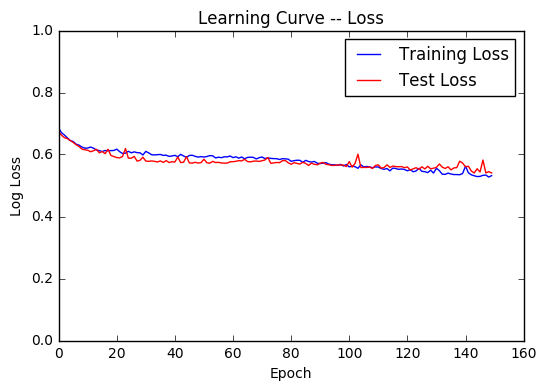

In [10]:
plt.figure()
plt.title("Learning Curve -- Loss")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.ylim((0.0, 1.0))
 
# Plot the loss for training and testing sets
train_loss_data = history.history['loss']
test_loss_data = history.history['val_loss']
plt.plot(train_loss_data, color="b", label='Training Loss')
plt.plot(test_loss_data, color="r", label='Test Loss')

# Draw the plot and reset the y-axis
plt.legend(loc="best")
plt.draw()
plt.show()

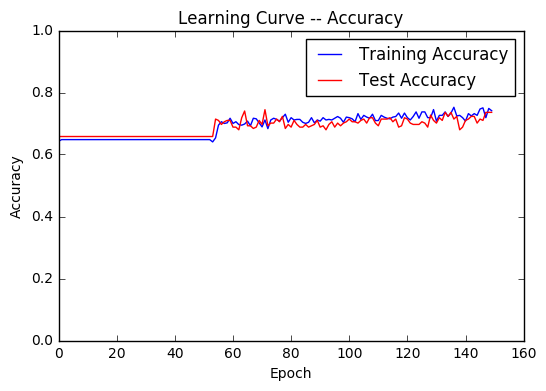

In [11]:
plt.figure()
plt.title("Learning Curve -- Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim((0.0, 1.0))
 
# Plot the loss for training and testing sets
train_acc_data = history.history['acc']
test_acc_data = history.history['val_acc']
plt.plot(train_acc_data, color="b", label='Training Accuracy')
plt.plot(test_acc_data, color="r", label='Test Accuracy')

# Draw the plot and reset the y-axis
plt.legend(loc="best")
plt.draw()
plt.show()

# Summary

With an accuracy of around 70%, this neural network seems to be a helpful tool in screening for diabetes in this particular population. If I were a patient, I would certainly want a physician's expert opinion before this particular tool single-handedly diagnosed me.